# 1. Description

a.Type of learning:
- Supervised 

b. Problem:
- Classification

c. Goal of the project: 
- to build the classifier that will predict whether or not a client will subscribe for term deposit. 

d. Objectives: 
- Accuracy target: 90%
- Recall: 80 %
- Algorithm doesn't have to be interpreted

e. Source of data:
- Data is found on the website of the UCI Machine Learning Repository: 
https://archive.ics.uci.edu/ml/datasets/bank+marketing

f. Means(versions will be shown down the line):
- Python 
- scikit-learn
- pandas 
- numpy
- scipy
- seaborn
- matplotlib

# 2. Import

In [ ]:
# Import of libraries
import pandas as pd
import numpy as np
import matplotlib as mtl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sc
import sklearn

import warnings
warnings.filterwarnings('ignore') 

plt.rcParams['figure.figsize'] = (10, 10)

#Import of data
data = pd.read_csv("bank.csv", sep = ";")

import sys
print ("Python version: {}".format(sys.version))
print ("Numpy version: {}".format(np.__version__))
print ("Pandas version: {}".format(pd.__version__))
print ("Matplotlib version: {}".format(mtl.__version__))
print ("Seaborn version: {}".format(sns.__version__))
print ("Scipy version: {}".format(sc.__version__))
print ("Scikit version: {}".format(sklearn.__version__))

# 3. Observation

In [222]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


#### Attribute information

Input variables:

- Bank client data:
 - 1 - age: age of the client (numeric)
 - 2 - job: type of the job of the client (categorical)
 - 3 - marital : marital status (categorical)
 - 4 - education : education of the client
 - 5 - default: has credit in default? (categorical)
 - 6 - housing: has housing loan? (categorical)
 - 7 - loan: has personal loan? (categorical)


- Related with the last contact of the current campaign:
 - 8 - contact: contact communication type (categorical) 
 - 9 - month: last contact month of year (categorical)
 - 10 - day_of_week: last contact day of the week (categorical)
 - 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


- Other attributes:
 - 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
 - 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
 - 14 - previous: number of contacts performed before this campaign and for this client (numeric)
 - 15 - poutcome: outcome of the previous marketing campaign (categorical)


- Output variable (desired target):
 - 21 - y - has the client subscribed a term deposit? (binary)

After our first look at data we definitely can get rid of feature "duration", as it is data leakage. We actually don't know how long our call will last before calling the client. Secondly, it stands to reason, that if the client is interested in our service, then the phone call tends to be longer. Thus, "duration" will be perfectly correlated with the target value.

In [223]:
del data['duration']

In the description on the website feature day_of_week is categorical and is supposed to have values categorical: 'mon','tue','wed','thu','fri'.
But instead we see other values: 

In [224]:
np.unique(data.day)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], dtype=int64)

I suppose that it means days of the month. I suggest that this feature has no impact on the target value. We can look at relative means and distributions of the variable within classes.

{'boxes': [<matplotlib.lines.Line2D at 0x19599474a58>,
 'caps': [<matplotlib.lines.Line2D at 0x195984e25f8>,
 'fliers': [<matplotlib.lines.Line2D at 0x195984f8c50>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x195984f8080>,
 'whiskers': [<matplotlib.lines.Line2D at 0x19598009dd8>,
  <matplotlib.lines.Line2D at 0x195994aabe0>]}

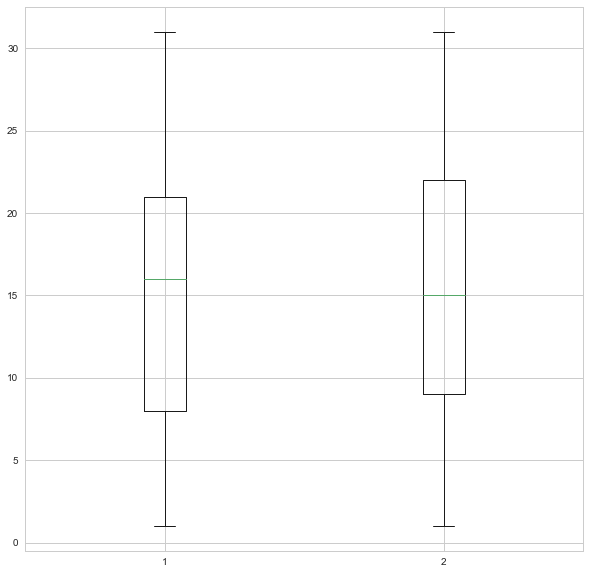

In [225]:
Class_0 = data.day[data.y == 'no']
Class_1 = data.day[data.y == 'yes']
data_to_plot = [Class_0, Class_1]
plt.boxplot(x = data_to_plot)

As evinced from the boxplot, differences of means are minor. We can get rid of the feature. 

In [226]:
del data['day']

Now we are getting down to feature "month".

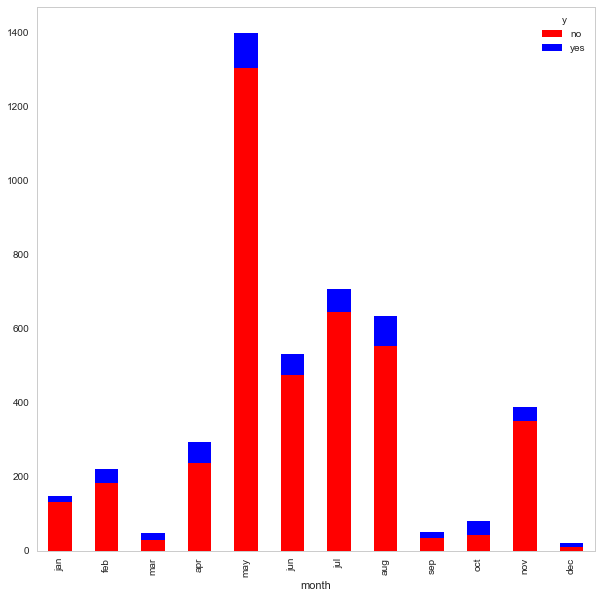

In [227]:
cross = pd.crosstab(data.month, data.y,)
cross = cross.reindex(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
cross.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

We don't see in the graph, that there is a clear relationship between month and the target value.  
It's quite bad that the number of observations during some months is much higher. 

I would make a suggestion, that our target value does not depend on a day of the month, but it may be that it depends on the season. Maybe before summertime people are more inclined to subscribe a term deposit. Or on the contrary. Maybe the season of bonuses or vacations may affect our target value somewhat.

I believe there'll be more sense to convert them into seasons: Winter: December-February, Spring: March-May, Summer: June-August, Autumn: September-November.

In [228]:
months = [['dec', 'jan', 'feb'], 
          ['mar', 'apr', 'may'], 
          ['jun', 'jul', 'aug'], 
          ['sep', 'oct', 'nov']]

seasons = ['winter', 'spring','summer', 'fall']

# Changing values of months for seasons 
for i, k in zip(months, seasons):
    data['month'].replace([i], k , inplace = True)

data.rename(columns = {'month':'season'}, inplace = True)

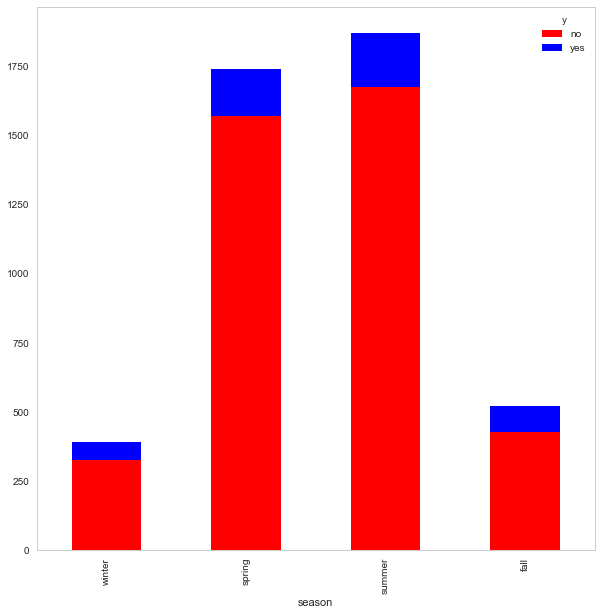

In [229]:
# Absolute values
cross = pd.crosstab(data.season, data.y)
cross = cross.reindex(['winter', 'spring', 'summer', 'fall'])
cross.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

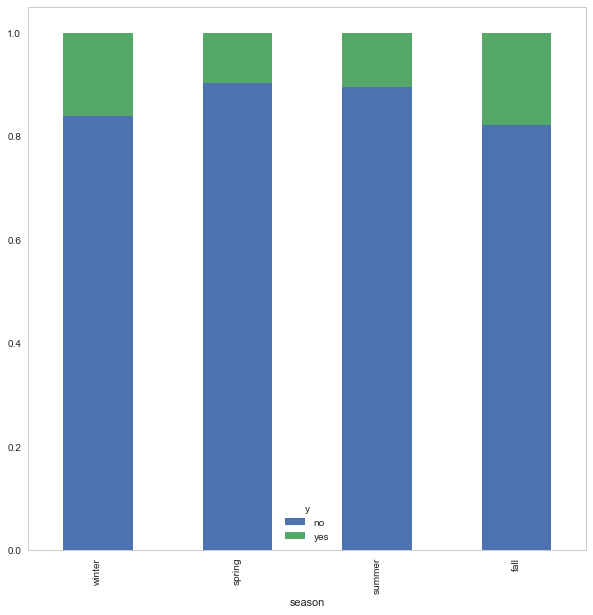

In [230]:
#Relative values
cross = pd.crosstab(data.season, data.y)
cross = cross.div(cross.sum(1).astype(float), axis=0)
cross = cross.reindex(['winter', 'spring', 'summer', 'fall'])
cross.plot(kind='bar', stacked=True,  grid=False)

Still I don't see any relationship between season and y. We can keep feature so far. 

### Dimensions

In [231]:
print('The dataset has {0} rows and {1} columns'.format(data.shape[0], data.shape[1]))

The dataset has 4521 rows and 15 columns


We have a decent amount of observations and supposedly the sample may be quite representative. 

### Format

In [232]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
season       object
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Many features have the format of object, what is inconvenient for analysis. 
Later we'll convert them into integer, using label encoding. 

### Values

In [233]:
data.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
season       False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

It's good to know, that we don't have any missing values. But function isnull is looking for values 'n/a'. Nevertheless missing values may be depicted in any other way. Thus, we'll make additional check for categorical variables. 

In [234]:
for i in data.columns: 
    if data[i].dtype == "O":
        print(np.unique(data[i].values))

['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
['divorced' 'married' 'single']
['primary' 'secondary' 'tertiary' 'unknown']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['cellular' 'telephone' 'unknown']
['fall' 'spring' 'summer' 'winter']
['failure' 'other' 'success' 'unknown']
['no' 'yes']


We found out that some features contain values "unknown". Based on their amount in each column we'll transform them, impute another value or delete them.  

In [235]:
#Calculating the percentage of missing values
data.replace("unknown", np.nan, inplace = True)
percentage = (data.isnull().sum()/len(data))*100
percentage.sort_values(inplace=True)
percentage

age           0.000000
marital       0.000000
default       0.000000
balance       0.000000
housing       0.000000
loan          0.000000
season        0.000000
campaign      0.000000
pdays         0.000000
previous      0.000000
y             0.000000
job           0.840522
education     4.136253
contact      29.285556
poutcome     81.950896
dtype: float64

We see that feature poutcome has overwhelmingly many missing values and may be the first candidate to be kicked off. Before doing it's worth looking at it once again. 

In [236]:
pd.crosstab(data.poutcome, data.y)

y,no,yes
poutcome,,
failure,427,63
other,159,38
success,46,83


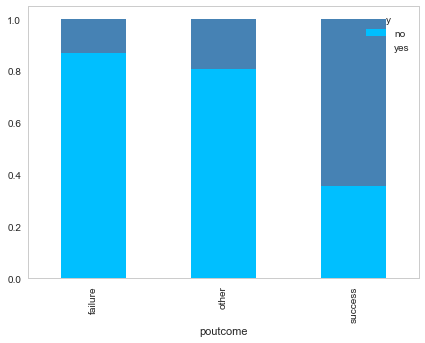

In [237]:
#Relative values
cross = pd.crosstab(data.poutcome, data.y)
cross.div(cross.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(7, 5))

As evinced from the graph, among those who accepted offers before, you can find the largest proportion of those who would say yes. 
Unfortunately, more than 80% of data for the feature is missing, and we don't have any idea of how this data is distributed. 
Still, there are imputation techniques, that could allow us to use this feature (I'm not going to cover it in this notebook)

In [238]:
del data["poutcome"]

### Class distribution

 Highly imbalanced problems (a lot more observations for one class than another) are common and may need special handling in the data preparation stage of your project. 

In [239]:
data.groupby('y').size() 

y
no     4000
yes     521
dtype: int64

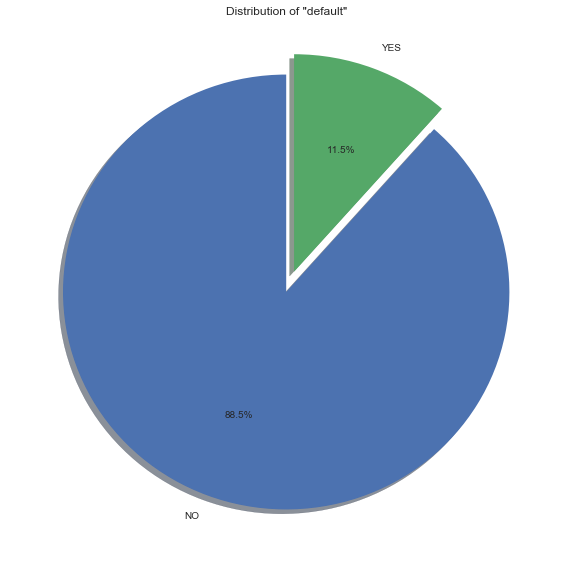

In [240]:
# Percentage of value "yes" in "default"
plt.pie([pd.value_counts(data.y)[0], pd.value_counts(data.y)[1]], 
        labels=["NO", "YES"], 
        startangle=90, 
        shadow=True, 
        explode=(0,0.1),
        autopct='%1.1f%%')
plt.title('Distribution of "default"')

More that 88% of our target variable is represented by one class. No doubt, our data is highly imbalanced. 

#### Conclusions drawn from the first look at out data

- We have numeric as well as categorical features
- Numeric features have different scales
- The data is imbalanced
- There are missing values. The feature 'poutcome' has over 80% missing values
- Feature "duration" correlates with our target variable due to data leakage. 

### Univariate analysis

In [241]:
data.describe()

,age,balance,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,2.793630,39.766645,0.542579
std,10.576211,3009.638142,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,50.000000,871.000000,25.000000


In this chart we see statistical descrption of continuous features. 
It's hard to make certain inferences here, though features like pdays, previous, campaign, etc. seem to be not normally disributed and have explicit outliers. Let's visualize it. 

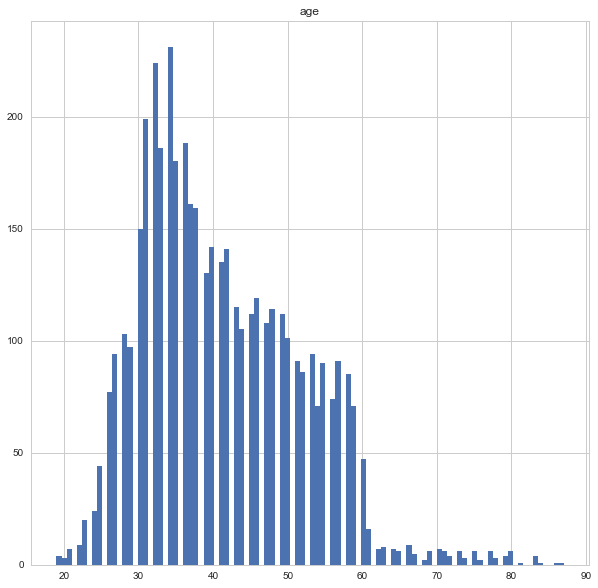

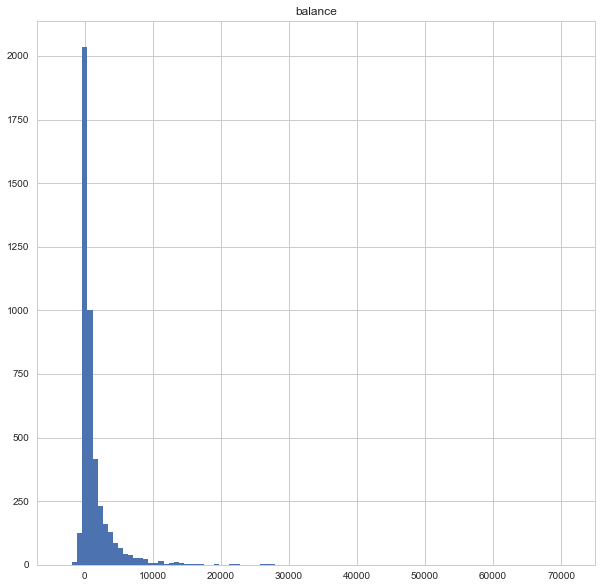

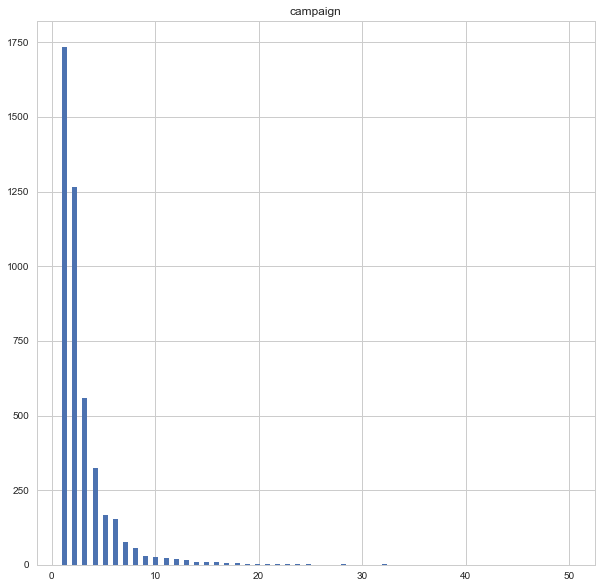

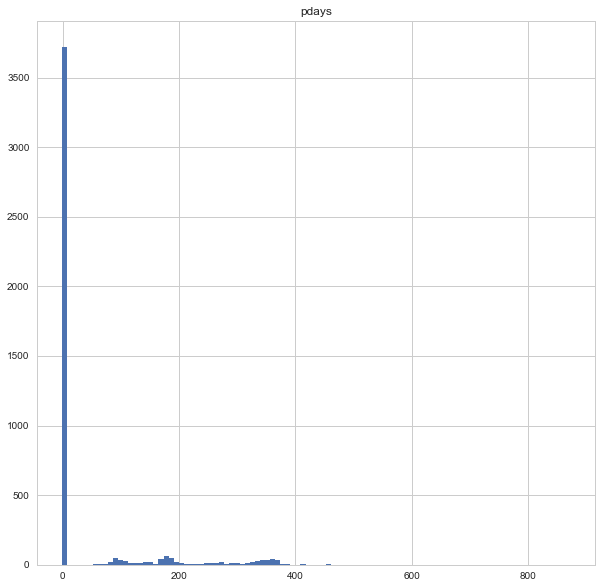

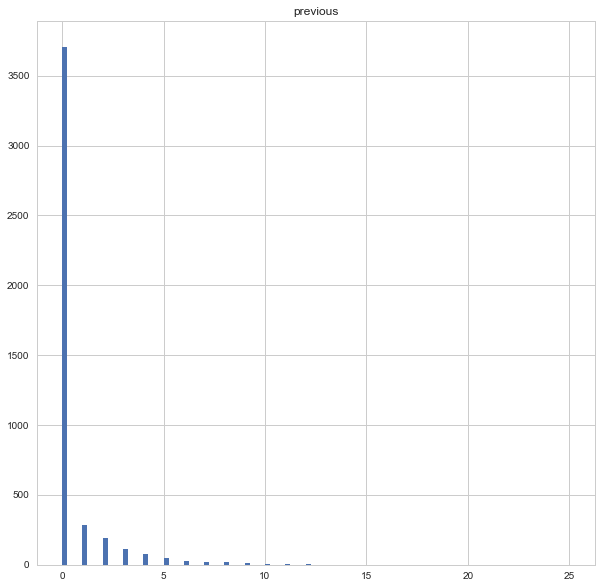

In [242]:
cont_feat = ["age", "balance", "campaign", "pdays", "previous"]
for i in cont_feat:
    plt.title(i)
    plt.hist(data[i], bins = 100)
    plt.show()

Let's take feature "previous"(number of contacts performed before this campaign and for this client). We see most of features have value "0". We will transform the feature into the binary one, saying, whether or not the client was contacted before. 

In [243]:
data.previous = data.previous.map(lambda x: 0 if x == 0 else 1)

The same we could apply to pdays due to very skewed distribution. 
But most of values represent cases, when a client was not previously contacted. 
We already retrieved this information from feature "previous".
So, we can do away with "pdays". To prove it I will pull up crosstab below. You will see, that these features represent the same characteristic.  

pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)

In [244]:
cross = pd.crosstab(data.previous, data.pdays)
cross

pdays,-1,1,2,3,5,7,28,38,56,57,...,484,500,541,674,683,687,761,804,808,871
previous,,,,,,,,,,,,,,,,,,,,,
0,3705,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,7,1,1,3,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [278]:
data.rename(columns = {'previous':'ContactedBefore'}, inplace = True)

In [246]:
del data["pdays"]

Now feature "campaign". It represents the number of contacts performed during this campaign and for this client (numeric, includes last contact). Pay attention to the fact, that there were several campaigns. We will leave the feature as is. 

We can apply filtering to continuous features. Though it's optional
, as many algorithms would be able to build models without it. 
Sometimes it could ease model building through getting rid of noise.

In [247]:
# FILTERING 
data=data[abs(data['balance']-data['balance'].mean())<= 3*data['balance'].std()]

##### Violinplot

The violin plot is similar to box plots, except that they also show the probability density of the data at different values (in the simplest case this could be a histogram). Wikipedia

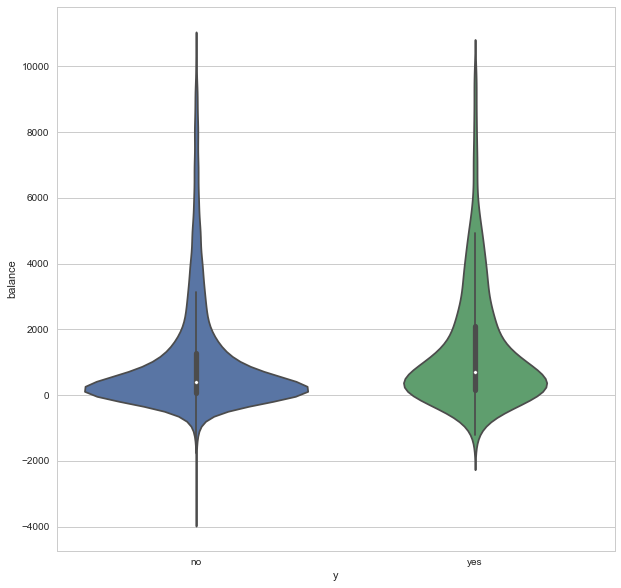

In [248]:
# Violinplot 
sns.violinplot(y=data["balance"], x=data["y"])

##### Probability plots

Probability plots are very instrumental, if we want to understand, whether or not data are normally distributed. 
Despite getting rid of noise, our data are still not normal. 

((array([-3.60454768, -3.36732307, -3.2364789 , ...,  3.2364789 ,
          3.36732307,  3.60454768]),
  array([-3313, -2082, -1746, ..., 10218, 10287, 10378], dtype=int64)),
 (1495.8435524186377, 1115.9756372659599, 0.84602303221228914))

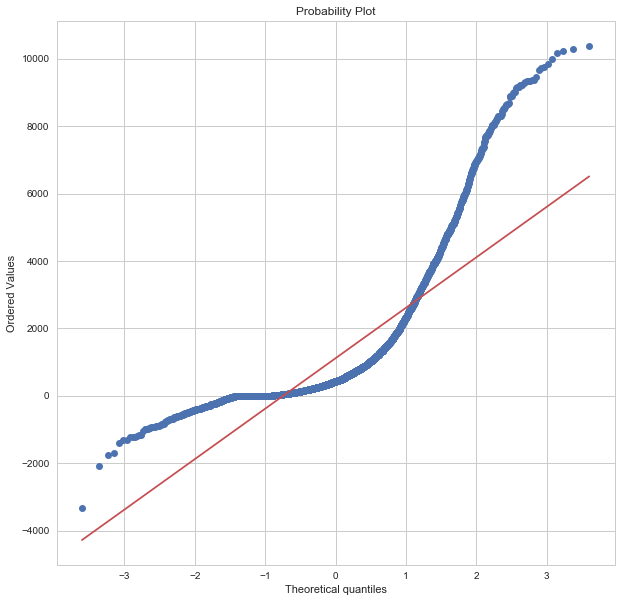

In [249]:
from scipy import stats
stats.probplot(data['balance'], plot=plt)

Now we are doing the same with "age"

In [250]:
# FILTERING 
data=data[abs(data['age']-data['age'].mean())<= 3*data['age'].std()]

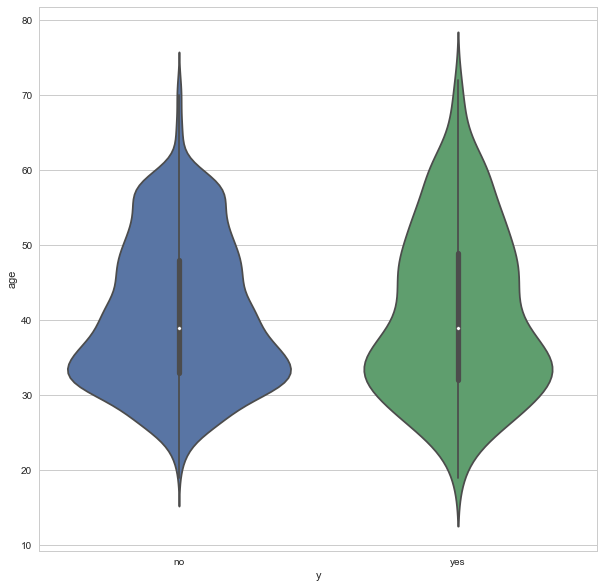

In [251]:
#Violinplot
sns.violinplot(y=data["age"], x=data["y"])

((array([-3.60201539, -3.36463453, -3.23369611, ...,  3.23369611,
          3.36463453,  3.60201539]),
  array([19, 19, 19, ..., 72, 72, 72], dtype=int64)),
 (9.798524466774138, 40.760364464692486, 0.98393073261716124))

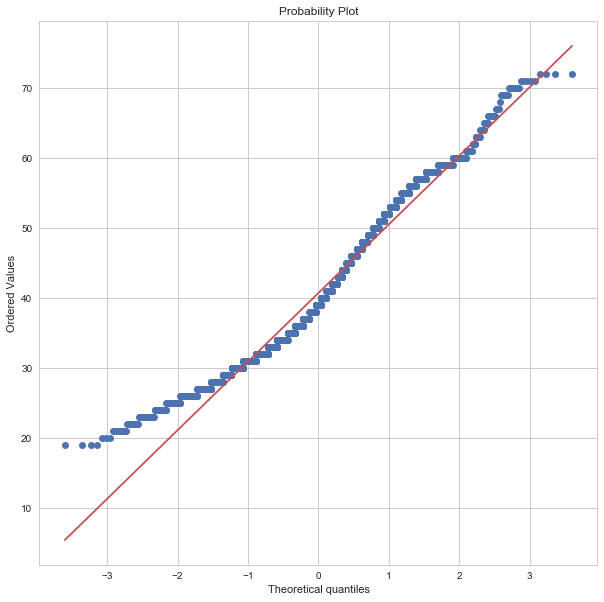

In [252]:
#Probability plot

stats.probplot(data['age'], plot=plt)

Another way to check for normality are statistical tests.

In [253]:
# Test for normality 
from scipy.stats import mstats
mstats.normaltest(data.age)

NormaltestResult(statistic=264.23306718931292, pvalue=4.1929384925356653e-58)

 As pvalue is much less than 0.05, Age is not normally distributed. Actually we don't need normal distribution here, as we are not going to pertaining statistical tools, requiring normal distribution. 
We can try to filter out outliers, though algorithms are able to successfully process data even without filtering. 

Unnormal distribution is not a big problem, as we are not going to use tools requiring normal distribution. We could use log-tranformation (data.age= np.log(data.age)), but there is no particular need. 

Let's pull up the pairplot, which could be highly instrumental to visualize correlation. 

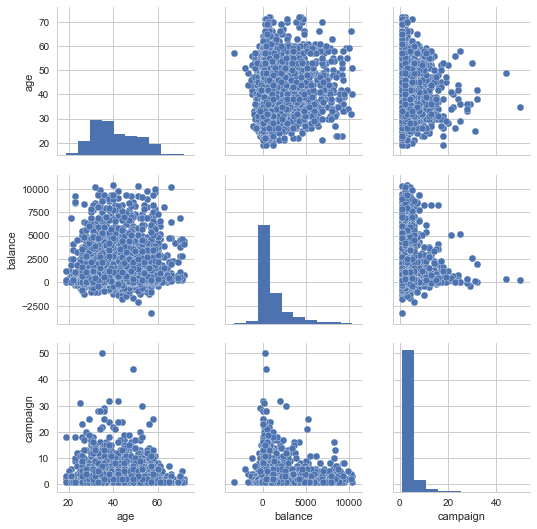

In [254]:
cont_feat = ["age", "balance", "campaign"]
sns.pairplot(data[cont_feat])

I don't see any indication of correlation. 

#### b) Univariate analysis of categorical features

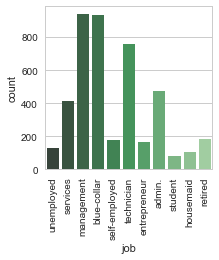

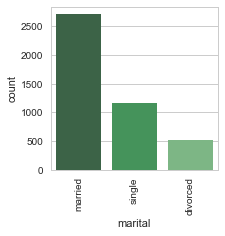

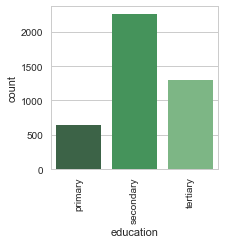

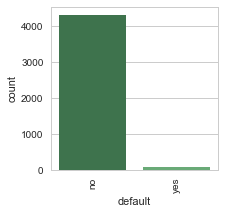

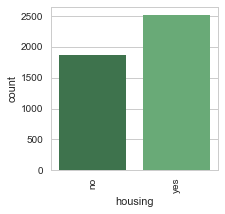

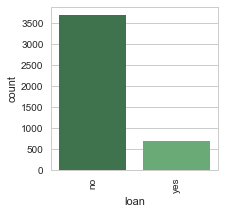

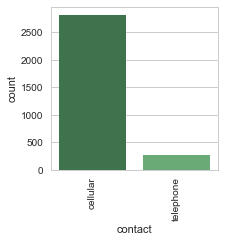

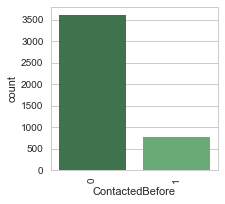

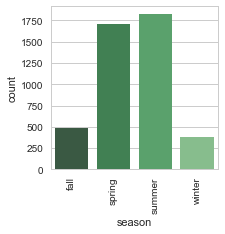

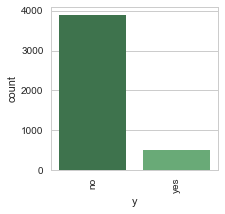

In [255]:
cat_feat = ["job", "marital", "education", "default", "housing", "loan", "contact", "ContactedBefore", "season", "y"]
# Histrograms for categorical features
for i in cat_feat:
    fig, ax = plt.subplots(figsize=(3, 3))
    sns.set(style="whitegrid", color_codes=True)
    sns.countplot(ax = ax, x=i, data=data, palette="Greens_d")
    plt.xticks(rotation=90)
    plt.show()

What catches my eye is an extremely low number of "yes" in "default"-histogram. I believe that the feature should be eliminated. I has to little information for us. 

In [256]:
del data["default"]

### Bivariate analysis

Alongside with pairplots we can employ another tool to scrutinize correlation. Correlation matrix.

In [257]:
data[["age", "balance", "campaign"]].corr(method='pearson')

,age,balance,campaign
age,1.000000,0.070142,-0.000441
balance,0.070142,1.000000,-0.009125
campaign,-0.000441,-0.009125,1.000000


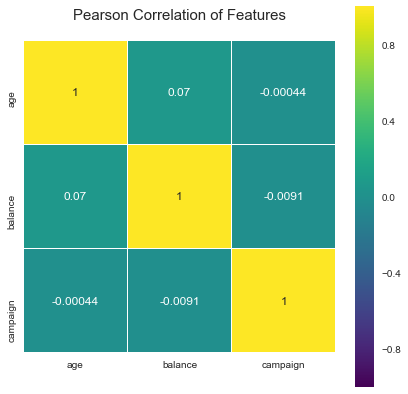

In [258]:
colormap = plt.cm.viridis
plt.figure(figsize=(7,7))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data[["age", "balance", "campaign"]].corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

As expected there is no correlation between continuous features

# 4. Preprocessing 

###  Missing values

#### Imputation strategies

It's time to choose the strategy to handle missing values. As we deal with missing values in categorical variables, the easiest way to employ Mode-substitution. 

In [259]:
for i in data.columns:
    data[i]=data[i].replace(np.nan, data[i].mode()[0])

### Data transformation

#### Labeling

Now we are transforming our categorical features into the format, that is convenient for algorithms. 

In [260]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cat_feat = ["job", "marital", "education", "housing", "loan","season", "contact", "y"]

for i in cat_feat:
    data[i] = le.fit_transform(data[i])

In [261]:
data.head()

,age,job,marital,education,balance,housing,loan,contact,season,campaign,ContactedBefore,y
0,30,10,1,0,1787,0,0,0,0,1,0,0
1,33,7,1,1,4789,1,1,0,1,1,1,0
2,35,4,2,2,1350,1,0,0,1,1,1,0
3,30,4,1,2,1476,1,1,0,2,4,0,0
4,59,1,1,1,0,1,0,0,1,1,0,0


#### Dummy variables

Creating dummy variables is a method to create separate variable for each category of a categorical variable.
Although, the categorical variable contains plenty of information and might show a causal relationship with output variable, it can't be used in the predictive models like linear and logistic regression without any processing.
https://www.packtpub.com/mapt/book/big_data_and_business_intelligence/9781788290098/10/ch02lvl1sec00019/creating-dummy-variables

In [262]:
data = pd.get_dummies(data, columns = ["job", "marital", "education"])

In [263]:
data.head()

,age,balance,housing,loan,contact,season,campaign,ContactedBefore,y,job_0,...,job_7,job_8,job_9,job_10,marital_0,marital_1,marital_2,education_0,education_1,education_2
0,30,1787,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1,33,4789,1,1,0,1,1,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,35,1350,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,30,1476,1,1,0,2,4,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,59,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


### Split into the input and output variables

In [264]:
# X are predictors
# Y is the targer variable
X = data[data.columns.difference(['y'])]
Y = data.y

### Splitting the data into train and test data

Before splitting, keep in mind, that our data are imbalanced. 

Parameter 'stratify' divides sets based on the equal representation of all classes. 

In [265]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size = 0.7, stratify = Y, random_state = 0)

### Rescaling

#### Standardization

In [266]:
from sklearn.preprocessing import StandardScaler
col_to_scale = ["age", "balance", "campaign"]
for i in col_to_scale:
    sc = StandardScaler().fit(X_train[i].values.reshape(-1, 1))
    X_train[i] = sc.transform(X_train[i].values.reshape(-1, 1))
    X_test[i] = sc.transform(X_test[i].values.reshape(-1, 1))

Take note, that train and test sets have been rescaled separately. 

## Feature engineering

### Feature Selection

To speed up our algorithms and make them more robust, we can implement feature selection. There are a great deal of methods, but we will utilize one of the easiest: Recursive Feature Elimination. 
"It recursively removes features, builds a model using the remaining attributes and calculates model accuracy..."


In [267]:
# Feature Extraction with RFE

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 15)
fit = rfe.fit(X_train, Y_train)
selected_feature = fit.support_

print("Num Features: %d", fit.n_features_) 
print("Selected Features: %s",  fit.support_)
print("Feature Ranking: %s", fit.ranking_) 

Num Features: %d 15
Selected Features: %s [ True False False  True  True  True False False  True False  True  True
 False  True False  True False  True  True  True  True  True  True False
 False]
Feature Ranking: %s [ 1  8 11  1  1  1  2  4  1  3  1  1  5  1  9  1  6  1  1  1  1  1  1  7 10]


In [268]:
# Dropping unimportant features
col_to_drop=[]
for i in range(len(X.columns)-1):
    if selected_feature[i] == False:
        col_to_drop.append(i)

X_train.drop(X.iloc[:, col_to_drop], axis=1, inplace = True)
X_test.drop(X.iloc[:, col_to_drop], axis=1, inplace = True)

Remaining columns

In [269]:
X_train.columns

Index(['ContactedBefore', 'campaign', 'contact', 'education_0', 'housing',
       'job_1', 'job_10', 'job_3', 'job_5', 'job_7', 'job_8', 'job_9', 'loan',
       'marital_0', 'marital_1', 'season'],
      dtype='object')

# 5. Model building

In [271]:
models = [
    SVC(kernel="rbf", class_weight = "balanced"), 
    KNeighborsClassifier(),
    DummyClassifier(strategy = 'most_frequent'), 
    LogisticRegression( class_weight="balanced"), 
]

### Training

In [272]:
scores = pd.DataFrame(columns= ['Model','Accuracy', 'F1-weighted', 'Precision', 'Recall'])
for model in models: 
    classifier=model.fit(X_train, Y_train)
    name = str(classifier).rsplit('(', 1)[0]
    accuracy = np.average(cross_val_score(classifier, X_test, Y_test, scoring= "accuracy"))
    f1 = np.average(cross_val_score(classifier, X_test, Y_test, scoring= "f1_weighted"))
    precision = np.average(cross_val_score(classifier, X_test, Y_test, scoring='precision_weighted'))
    recall = np.average(cross_val_score(classifier, X_test, Y_test, scoring='recall_weighted'))
    scores = scores.append({'Model': name,'Accuracy': accuracy,'F1-weighted': f1,
                             'Precision': precision, 'Recall': recall}, ignore_index=True)
    
scores.set_index("Model")  

,Accuracy,F1-weighted,Precision,Recall
Model,,,,
SVC,0.714640,0.757450,0.839342,0.714640
KNeighborsClassifier,0.876344,0.837478,0.818640,0.876344
DummyClassifier,0.887081,0.834000,0.786913,0.887081
LogisticRegression,0.653119,0.715315,0.841729,0.653119


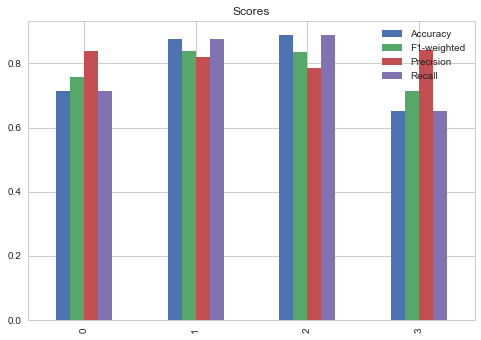

In [273]:
scores.plot(kind='bar', title='Scores' )

Based on the above results, I would definitely choose KNeighborsClassifier.

Now let's tune hyperparameters of KNeigborsClassifier

In [274]:
from sklearn.grid_search import GridSearchCV
                    
parameters = {'n_neighbors': np.arange(10)+1}

model = GridSearchCV(KNeighborsClassifier(),
                    parameters,
                    n_jobs               = 5,
                    cv                   = 5,
                    scoring              = 'f1_weighted'
                    ) 

model.fit(X_train, Y_train)
print("\nThe best estimator: ", model.best_estimator_)
print("\nThe best precision score: ", model.best_score_)
print("\nHighest scoring parameter set: ", model.best_params_)
model = model.best_estimator_


The best estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

The best precision score:  0.8407045222035818

Highest scoring parameter set:  {'n_neighbors': 5}


Let's take a look at metrics after fine-tuning

In [275]:
accuracy = model_selection.cross_val_score(model, X, Y, scoring='accuracy', cv=5) 
print( "Accuracy: "+ str(round(100*accuracy.mean(), 2)))
f1 = model_selection.cross_val_score(model, X, Y, scoring='f1_weighted', cv=5) 

print("F1: " + str(round(100*f1.mean(), 2)))
precision = model_selection.cross_val_score(model, X, Y, scoring='precision_weighted', cv=5) 
print("Precision: " + str(round(100*precision.mean(), 2)))
recall = model_selection.cross_val_score(model, X, Y, scoring='recall_weighted', cv=5)
print("Recall: " + str(round(100*recall.mean(), 2)), "\n")

Accuracy: 87.79
F1: 83.4
Precision: 80.89
Recall: 87.79 



Metrics look pretty good, but make no mistake. It's still too early to judge. 

###  Evaluation

##### Normalized Confusion matrix

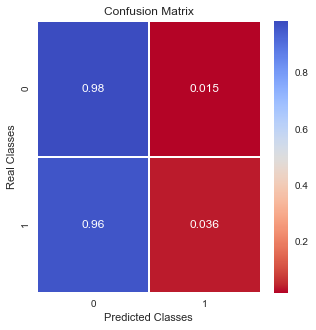

In [276]:
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_test)
conf_m = confusion_matrix(Y_test,Y_pred)

Y_test_0 = Y_test.value_counts()[0]
Y_test_1 = Y_test.value_counts()[1]

conf_m_norm = np.array([[1.0 / Y_test_0, 1.0/Y_test_0],[1.0/Y_test_1, 1.0/Y_test_1]])
norm_conf_matrix = cm * cm_norm


fig = plt.figure(figsize=(5,5))
sns.heatmap(norm_cm_matrix, cmap='coolwarm_r',linewidths=0.5,annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Real Classes')
plt.xlabel('Predicted Classes')

In [277]:
cm

array([[2757,   43],
       [ 352,   13]])

# 8. Conclusions

As we see our model is pretty bad. It makes too many False Negatives, what is really important for our business task. 
I believe, this is because of low-quality data. We simply don't have reliable predicting features. Except for "poutcome", which has a lot of missing values. 

Let's define clearly our task again. In our case, it was more important to pick out all the clients, that are inclined to subscribe term deposit, than to call the wrong person. The cost of the missed client is much higher than the cost of the wrong call.

So False Negative must be around zero. But If our algorithm will always predict 1, then there is no avail of it. It would mean that we decided to call everybody. It's a waste of time and money. Thus, there should be a tradeoff between precision and recall.

Moreover our situation is getting more complex due to the unbalanced data. We have to select an algorithm that is not sensitive to it. It may be done by tuning hyperparameters like class_weight.

We want to have an algorithm, that would recommend us certain clients to be contacted. Our algorithm is not designed to be interpreted.

We compared several algorithms for classification and unfortunately failed to find a good one



____________


The notebook will be periodically supplemented and updated. 

I tried to keep this notebook as simple, as possible, so any newcomer will be able to quikly wrap his/her head around the basics of data analysis. 

I will appreciate any critics, as I'm new to data science and would be elated to get tips on how to improve. 

In this notebook I didn't touch such topics as ROC-curves, Pipelines, Boosting, Stacking, etc., because I'm going to do it down the line. 





## References

Here I will put notebooks and books that were very helpful.